<a href="https://colab.research.google.com/github/tanvir917/datascience/blob/main/StatisticalAnalysis_On_mathematics_country_of_birth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Exploration:
Import the dataset into a pandas DataFrame.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import pandas as pd
import scipy.stats as stats
import math
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/csv/mathematics-country-of-birth.csv")


##Exploratory Data Analysis(EDA):

This part consists of summary statistics of data but the major focus will be on EDA where we extract meaning/information from data using plots and report important insights about data. This part is more about data analysis and business intelligence(BI).

In [ ]:
df.head()

,_id,LearningArea,YearLevel,AchievementResult,CountryOfBirthCode,CountryOfBirthName
0,1,MATHEMATICS,05,B,1101.0,Australia
1,2,MATHEMATICS,05,A,1101.0,Australia
2,3,MATHEMATICS,09,A,1101.0,Australia
3,4,MATHEMATICS,12,B,1101.0,Australia
4,5,MATHEMATICS,11,B,1101.0,Australia


In [ ]:
df.shape

(261500, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261500 entries, 0 to 261499
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   _id                 261500 non-null  int64  
 1   LearningArea        261500 non-null  object 
 2   YearLevel           261500 non-null  object 
 3   AchievementResult   261500 non-null  object 
 4   CountryOfBirthCode  260178 non-null  float64
 5   CountryOfBirthName  260178 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 12.0+ MB


In [ ]:
df.describe()

,_id,CountryOfBirthCode
count,261500.000000,260178.000000
mean,130750.500000,1105.139516
std,75488.692034,100.904367
min,1.000000,0.000000
25%,65375.750000,1101.000000
50%,130750.500000,1101.000000
75%,196125.250000,1101.000000
max,261500.000000,8104.000000


In [ ]:
df.describe(include=['object'])

,LearningArea,YearLevel,AchievementResult,CountryOfBirthName
count,261500,261500,261500,260178
unique,1,13,12,17
top,MATHEMATICS,01,C,Australia
freq,261500,25428,90634,259250


In [ ]:
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)
print(f'categorical variables:  {cats}')
print(f'numerical variables:  {nums}')

categorical variables:  ['LearningArea', 'YearLevel', 'AchievementResult', 'CountryOfBirthName']
numerical variables:  ['_id', 'CountryOfBirthCode']


In [ ]:
# let's inspect how many unique values are there in each column.
df.nunique(axis=0)

_id                   261500
LearningArea               1
YearLevel                 13
AchievementResult         12
CountryOfBirthCode        17
CountryOfBirthName        17
dtype: int64

In [ ]:
df.isna().sum()

_id                      0
LearningArea             0
YearLevel                0
AchievementResult        0
CountryOfBirthCode    1322
CountryOfBirthName    1322
dtype: int64

In [ ]:
# let's print these 1322 `nan` containing rows 
df[df.isnull().any(axis=1)]

,_id,LearningArea,YearLevel,AchievementResult,CountryOfBirthCode,CountryOfBirthName
829,830,MATHEMATICS,03,C,NaN,NaN
830,831,MATHEMATICS,01,D,NaN,NaN
831,832,MATHEMATICS,01,B,NaN,NaN
832,833,MATHEMATICS,04,D,NaN,NaN
833,834,MATHEMATICS,PY,Working With,NaN,NaN
...,...,...,...,...,...,...
20102,20103,MATHEMATICS,03,D,NaN,NaN
20103,20104,MATHEMATICS,03,B,NaN,NaN
20104,20105,MATHEMATICS,PY,Exploring,NaN,NaN
20105,20106,MATHEMATICS,05,C,NaN,NaN


In [ ]:
# nan rows proportion in data
1322 / len(df)

0.0050554493307839385

So population consists of total of 1322 nan rows comprising of around 0.5% of data. As this fraction is very low so it's safe to drop these nan rows for now.

In [ ]:
# for now remove all nan rows as they are just 1.5%
df = df[~df.isnull().any(axis=1)]
df.reset_index(inplace=True)
df.drop('index', inplace=True, axis=1)
df.shape

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(260178, 6)

In [ ]:
# find total duplicate entries and drop them if any
print(f'total duplicate rows: {df.duplicated().sum()}')

# drop duplicate rows if any
df = df[~df.duplicated()]
df.shape

total duplicate rows: 0


(260178, 6)

In [ ]:
# remove extra spaces if any
for col in ['AchievementResult', 'CountryOfBirthName', 'YearLevel']:
    df[col] = df[col].apply(lambda x: ' '.join(x.split()))

In [ ]:
# before we move ahead it's a good practice to group all variables together having same type.
df = pd.concat((df[cats], df[nums]), axis=1)
df.head()

,LearningArea,YearLevel,AchievementResult,CountryOfBirthName,_id,CountryOfBirthCode
0,MATHEMATICS,05,B,Australia,1,1101.0
1,MATHEMATICS,05,A,Australia,2,1101.0
2,MATHEMATICS,09,A,Australia,3,1101.0
3,MATHEMATICS,12,B,Australia,4,1101.0
4,MATHEMATICS,11,B,Australia,5,1101.0


Different Sampling Techniques in Statistics
1. Random sampling

Random sampling is a part of the sampling technique in which each sample has an equal probability of being chosen. Under random sampling, each member of the subset carries an equal opportunity of being chosen as a part of the sampling process.

2. Stratified sampling

Stratified sampling is a common sampling technique used by researchers when trying to draw conclusions from different sub-groups. For example, you have three sub-groups with a population size of 150, 200, 250 subjects in each subgroup respectively.

3. Systematic sampling

Systematic sampling is a probability sampling method where researchers select members of the population at a regular interval – for example, by selecting every 15th person on a list of the population. If the population is in a random order, this can imitate the benefits of simple random sampling.

4. Cluster sampling

Cluster sampling is a probability sampling method in which you divide a population into clusters, such as districts or schools, and then randomly select some of these clusters as your sample. In single-stage sampling, you collect data from every unit within the selected clusters.

##Statistical Analysis:

In this part we will do many statistical hypothesis testing, apply estimation statistics and interpret the results we get. We will also validate this with the findings from part one. We will apply both parametric and non-parametric tests. We will report all the important insights we get in this part. This part is all about data science requires statistical background.

In [ ]:
# Contingency Table (aka frequency table)
pd.crosstab(df.YearLevel, df.AchievementResult).T

YearLevel,01,02,03,04,05,06,07,08,09,10,11,12,PY
AchievementResult,,,,,,,,,,,,,
A,2968,2344,2515,2772,2440,2894,2749,2226,2315,1256,1843,2382,0
Applying,0,0,0,0,0,0,0,0,0,0,0,0,3069
B,8296,7563,7294,7250,6555,6438,5141,4849,4295,2971,5587,5633,0
Becoming Aware,0,0,0,0,0,0,0,0,0,0,0,0,907
C,8799,8989,9768,9176,8788,8030,6860,6661,6030,4515,6588,6031,0
D,3920,4456,4527,3826,3687,3232,2453,2655,2843,1852,1818,852,0
DW,1,3,1,2,1,0,2,6,1,1,1,0,1
E,993,986,674,444,348,268,279,357,575,382,216,46,0
Exploring,0,0,0,0,0,0,0,0,0,0,0,0,3799


In [ ]:
# Contingency Table (aka frequency table)
pd.crosstab(df.CountryOfBirthName, df.AchievementResult).T

CountryOfBirthName,"Africa, nfd","Americas, nfd","Asia, nfd",Asia-Pacific Economic Co-operation (APEC),Australia,Belgium,Central America and the Caribbean (excludes Mexico),"Eastern Europe, nfd","Europe, nfd",France,Inadequately Described,Iraq,Italy,Serbia,Switzerland,"United Kingdom, Channel Islands and Isle of Man, nfd",United States of America
AchievementResult,,,,,,,,,,,,,,,,,
A,0,11,0,0,28511,0,0,0,0,2,6,0,0,0,3,171,0
Applying,0,0,0,0,3064,0,0,0,0,0,0,0,0,0,0,5,0
B,3,10,0,0,71542,0,0,1,0,2,4,0,2,0,3,304,1
Becoming Aware,0,0,0,0,907,0,0,0,0,0,0,0,0,0,0,0,0
C,0,7,0,0,89965,0,0,0,0,1,7,1,1,1,0,251,1
D,0,3,0,0,36060,0,0,1,0,0,4,0,1,0,0,52,0
DW,2,3,1,1,0,0,2,4,3,0,4,0,0,0,0,0,0
E,0,0,0,0,5563,0,0,0,0,0,1,0,0,0,0,4,0
Exploring,0,0,0,0,3794,0,0,0,0,0,1,0,0,0,0,4,0


In [ ]:
# Contingency Table (aka frequency table)
pd.crosstab(df.CountryOfBirthName, df.YearLevel).T

CountryOfBirthName,"Africa, nfd","Americas, nfd","Asia, nfd",Asia-Pacific Economic Co-operation (APEC),Australia,Belgium,Central America and the Caribbean (excludes Mexico),"Eastern Europe, nfd","Europe, nfd",France,Inadequately Described,Iraq,Italy,Serbia,Switzerland,"United Kingdom, Channel Islands and Isle of Man, nfd",United States of America
YearLevel,,,,,,,,,,,,,,,,,
01,2,2,0,0,25072,0,0,0,0,1,1,0,0,0,0,79,0
02,0,0,0,0,24361,0,1,2,1,1,1,0,2,0,1,122,1
03,0,3,0,0,24854,0,0,1,0,2,0,0,0,0,2,100,0
04,3,3,0,0,23519,0,0,1,1,0,0,0,0,0,3,124,0
05,0,3,0,0,21870,0,0,1,0,0,16,0,1,1,0,92,0
06,0,5,0,0,20940,0,0,0,0,0,4,0,1,0,0,63,0
07,0,2,0,0,17809,0,1,0,1,1,0,1,1,0,0,66,1
08,0,2,1,1,17133,0,0,1,0,0,1,0,0,0,0,55,0
09,1,6,0,0,16407,0,0,0,0,0,0,0,0,0,0,38,0


In [ ]:
pd.pivot_table(df, index=['CountryOfBirthName', 'YearLevel'],
                     columns=[ 'AchievementResult'], aggfunc=len)

CountryOfBirthCode  \
AchievementResult                                                             A   
CountryOfBirthName                                 YearLevel                      
Africa, nfd                                        01                       NaN   
                                                   04                       NaN   
                                                   09                       NaN   
                                                   11                       NaN   
Americas, nfd                                      01                       1.0   
...                                                                         ...   
United Kingdom, Channel Islands and Isle of Man... 11                       3.0   
                                                   12                       5.0   
                                                   PY                       NaN   
United States of America                           02                       NaN   
                                                   07                       NaN   

                                                                            \
AchievementResult                                            Applying    B   
CountryOfBirthName                                 YearLevel                 
Africa, nfd                                        01             NaN  1.0   
                                                   04             NaN  2.0   
                                                   09             NaN  NaN   
                                                   11             NaN  NaN   
Americas, nfd                                      01             NaN  1.0   
...                                                               ...  ...   
United Kingdom, Channel Islands and Isle of Man... 11             NaN  6.0   
                                                   12             NaN  4.0   
                                                   PY             5.0  NaN   
United States of America                           02             NaN  1.0   
                                                   07             NaN  NaN   

                                                                             \
AchievementResult                                            Becoming Aware   
CountryOfBirthName                                 YearLevel                  
Africa, nfd                                        01                   NaN   
                                                   04                   NaN   
                                                   09                   NaN   
                                                   11                   NaN   
Americas, nfd                                      01                   NaN   
...                                                                     ...   
United Kingdom, Channel Islands and Isle of Man... 11                   NaN   
                                                   12                   NaN   
                                                   PY                   NaN   
United States of America                           02                   NaN   
                                                   07                   NaN   

                                                                             \
AchievementResult                                               C    D   DW   
CountryOfBirthName                                 YearLevel                  
Africa, nfd                                        01         NaN  NaN  NaN   
                                                   04         NaN  NaN  NaN   
                                                   09         NaN  NaN  1.0   
                                                   11         NaN  NaN  1.0   
Americas, nfd                                      01         NaN  NaN  NaN   
...                                                           ... 

In [ ]:
pd.pivot_table(df,'CountryOfBirthCode', index=['YearLevel'],
                     columns=[ 'AchievementResult'])

AchievementResult,A,Applying,B,Becoming Aware,C,D,DW,E,Exploring,Making Connections,N,Working With
YearLevel,,,,,,,,,,,,
01,1110.729447,NaN,1106.048698,NaN,1103.157177,1101.509694,0.000000,1103.012085,NaN,NaN,1099.983333,NaN
02,1113.875853,NaN,1107.236150,NaN,1106.024252,1103.959605,538.666667,1103.026369,NaN,NaN,1114.177632,NaN
03,1109.903380,NaN,1109.248698,NaN,1104.365377,1102.986083,3300.000000,1101.000000,NaN,NaN,1106.459016,NaN
04,1108.644300,NaN,1110.226897,NaN,1106.858544,1102.566649,2105.500000,1101.000000,NaN,NaN,1100.005435,NaN
05,1112.219672,NaN,1107.064989,NaN,1103.683432,1103.574722,3300.000000,1097.836207,NaN,NaN,1101.000000,NaN
06,1109.907395,NaN,1108.048618,NaN,1103.848692,1101.309097,NaN,1101.000000,NaN,NaN,1101.000000,NaN
07,1109.761368,NaN,1106.830578,NaN,1106.391399,1101.407256,808.000000,1101.000000,NaN,NaN,1103.503759,NaN
08,1105.936658,NaN,1104.296350,NaN,1104.299505,1102.881356,3469.666667,1101.000000,NaN,NaN,1103.270455,NaN
09,1111.234989,NaN,1104.023749,NaN,1104.960531,1107.610271,918.000000,1101.000000,NaN,NaN,1101.000000,NaN


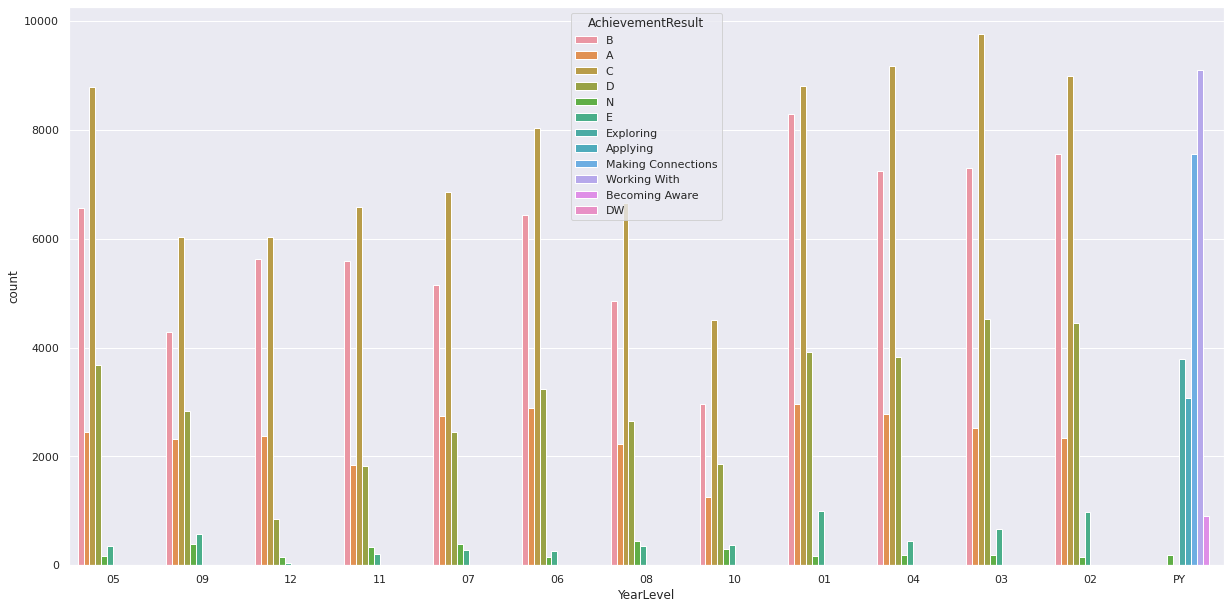

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20.7,10.27)})
sns.countplot(x="YearLevel", hue="AchievementResult", data=df)

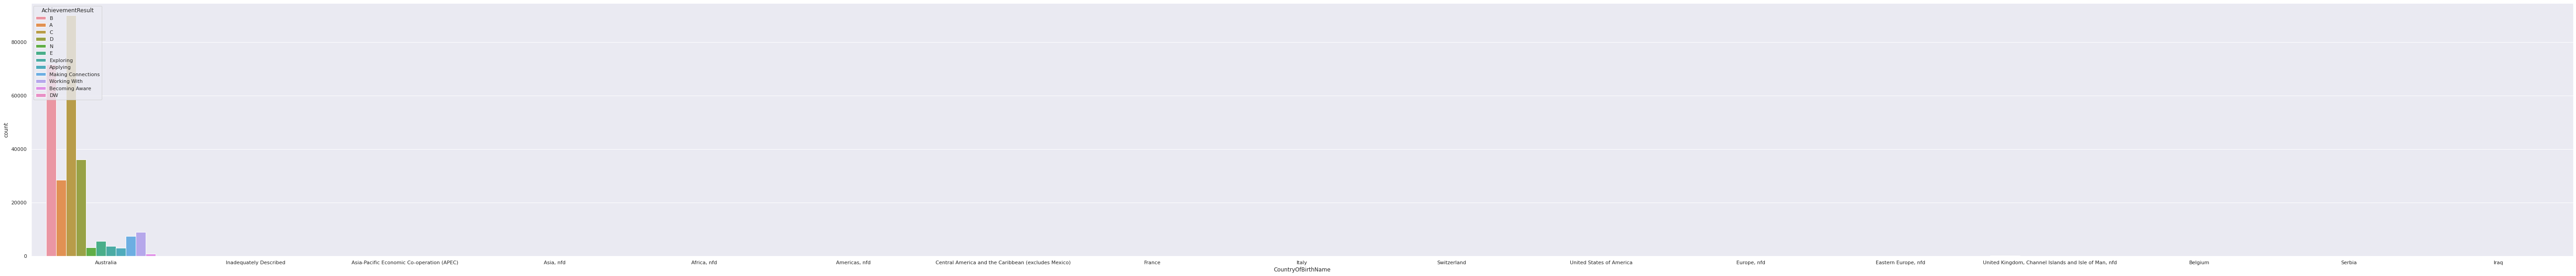

In [ ]:
sns.set(rc={'figure.figsize':(100.7,10.27)})
sns.countplot(x="CountryOfBirthName", hue="AchievementResult", data=df)

In [ ]:
df = df[df.YearLevel != 'PY']

In [ ]:
df = df[df.AchievementResult != 'DW']

In [ ]:
resultmap = {'A':100, 'B':80, 'C':70, 'D':60, 'E':50, 'N':0}
df = df.applymap(lambda s: resultmap.get(s) if s in resultmap else s)

In [ ]:
df

,LearningArea,YearLevel,AchievementResult,CountryOfBirthName,_id,CountryOfBirthCode
0,MATHEMATICS,05,80,Australia,1,1101.0
1,MATHEMATICS,05,100,Australia,2,1101.0
2,MATHEMATICS,09,100,Australia,3,1101.0
3,MATHEMATICS,12,80,Australia,4,1101.0
4,MATHEMATICS,11,80,Australia,5,1101.0
...,...,...,...,...,...,...
260173,MATHEMATICS,06,100,Australia,261496,1101.0
260174,MATHEMATICS,12,100,Australia,261497,1101.0
260175,MATHEMATICS,03,80,Australia,261498,1101.0
260176,MATHEMATICS,03,80,Australia,261499,1101.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


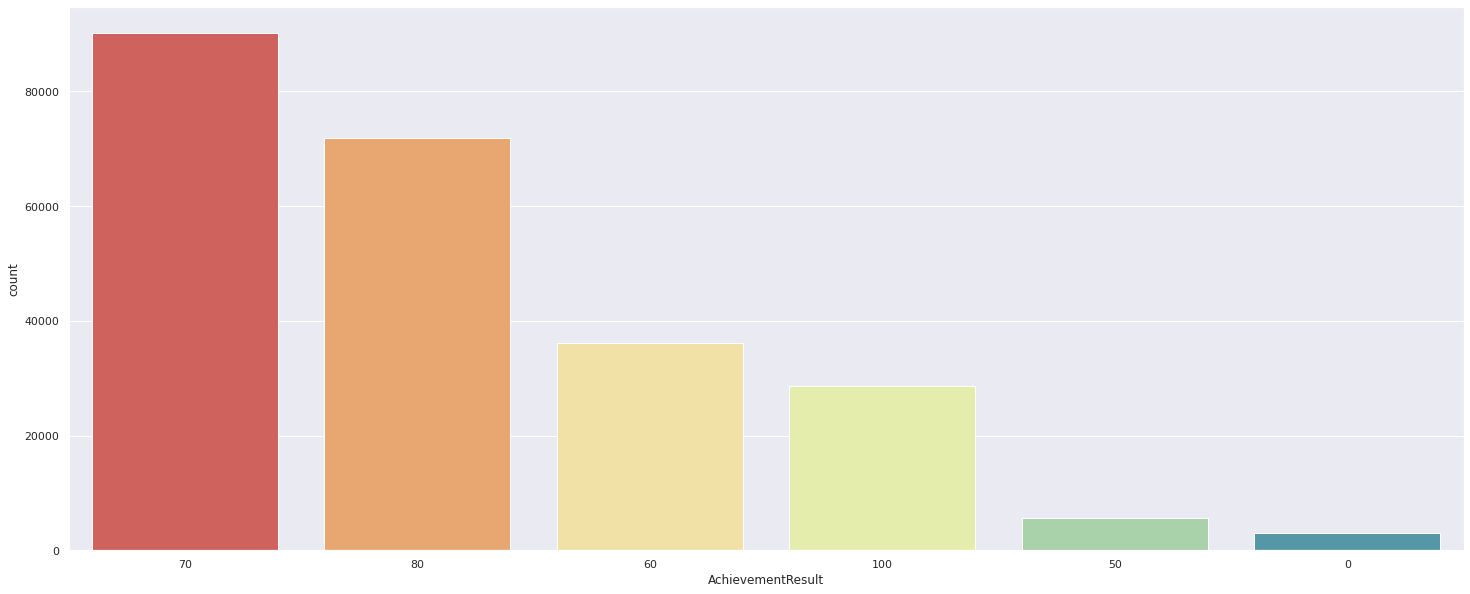

In [ ]:
plt.figure(figsize = (25,10))
sns.countplot(df['AchievementResult'], palette="Spectral", 
            order=df['AchievementResult'].value_counts(ascending=False).index)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


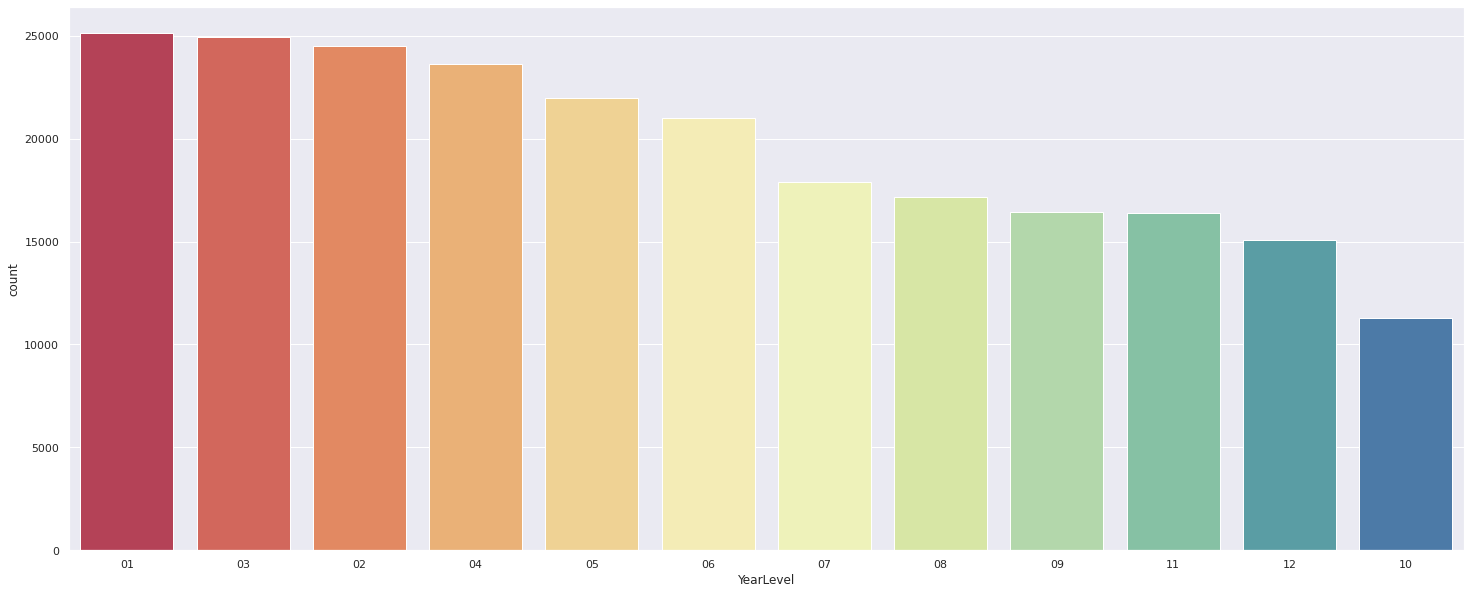

In [ ]:
plt.figure(figsize = (25,10))
sns.countplot(df['YearLevel'], palette="Spectral", 
            order=df['YearLevel'].value_counts(ascending=False).index)
plt.show()

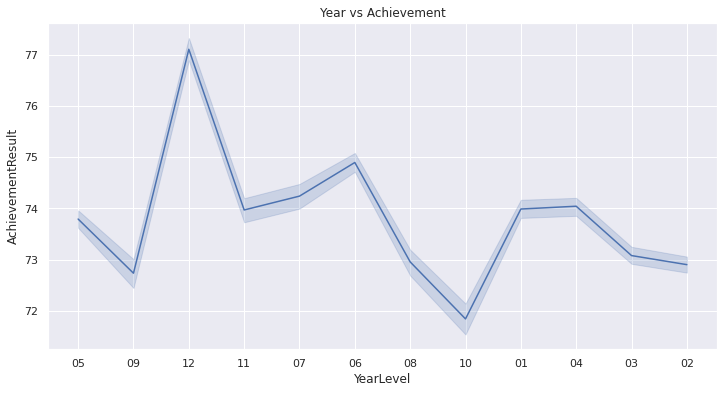

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Year vs Achievement")
sns.lineplot(x='YearLevel', y='AchievementResult',data=df)
plt.show()

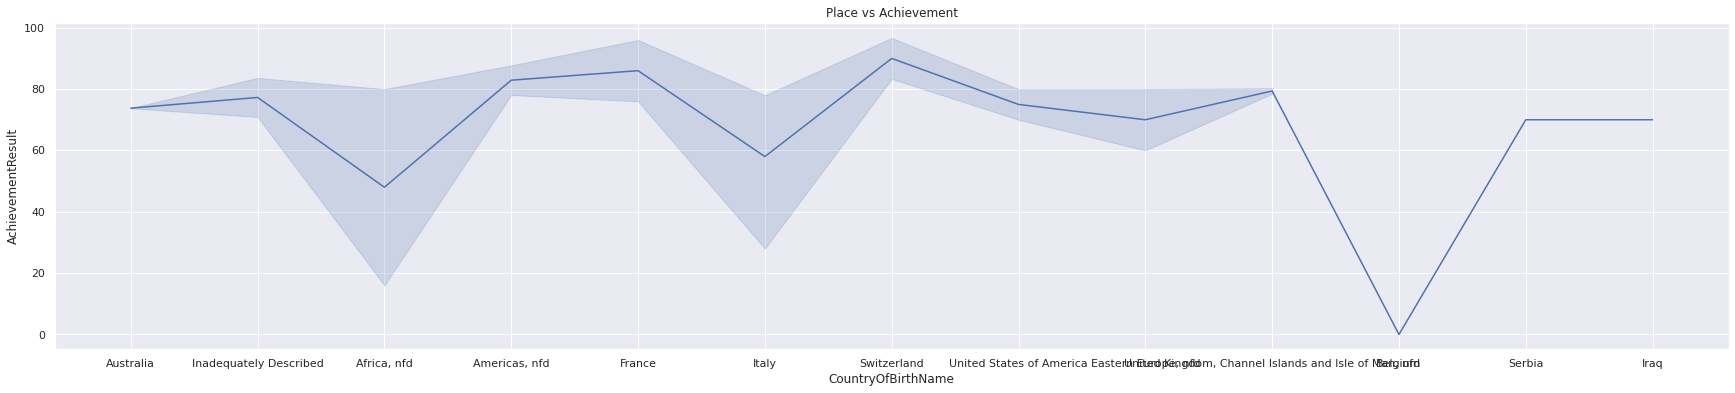

In [ ]:
plt.figure(figsize=(30,6))
plt.title("Place vs Achievement")
sns.lineplot(x='CountryOfBirthName', y='AchievementResult',data=df)
plt.show()

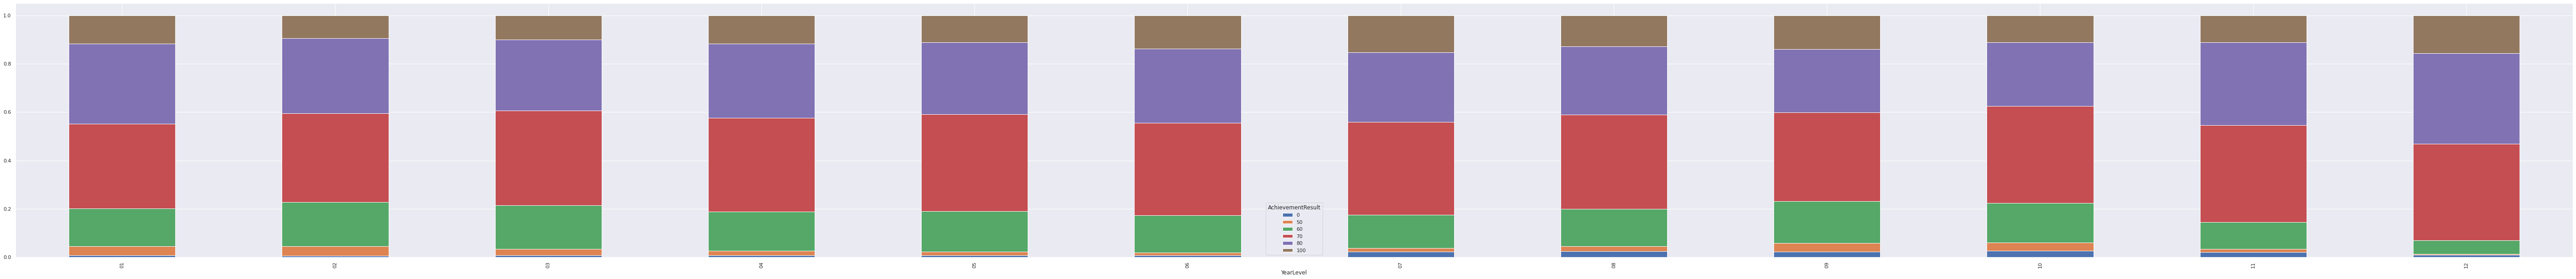

In [ ]:
(pd.crosstab(df['YearLevel'],df['AchievementResult'], 
             normalize='index')
   .plot.bar(stacked=True)
)

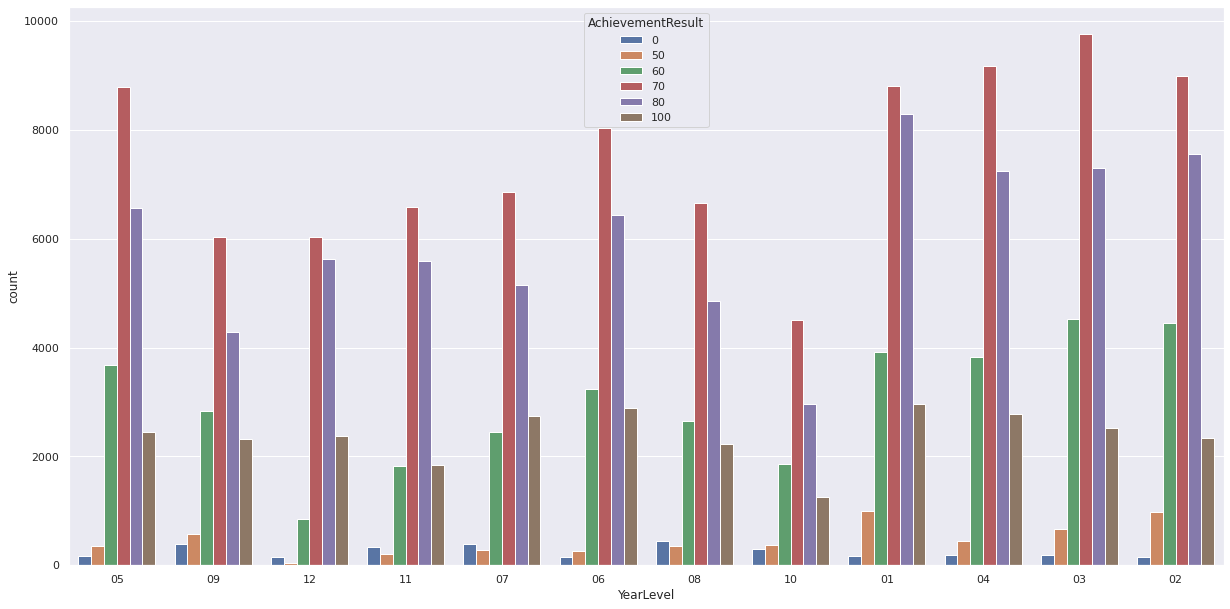

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20.7,10.27)})
sns.countplot(x="YearLevel", hue="AchievementResult", data=df)

In [ ]:
df['YearLevel'] = df['YearLevel'].astype(str).astype(int)

In [ ]:
df['AchievementResult'] = df['AchievementResult'].astype(str).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235533 entries, 0 to 260177
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   LearningArea        235533 non-null  object 
 1   YearLevel           235533 non-null  int64  
 2   AchievementResult   235533 non-null  int64  
 3   CountryOfBirthName  235533 non-null  object 
 4   _id                 235533 non-null  int64  
 5   CountryOfBirthCode  235533 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 20.6+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa725869c40>,
      dtype=object)

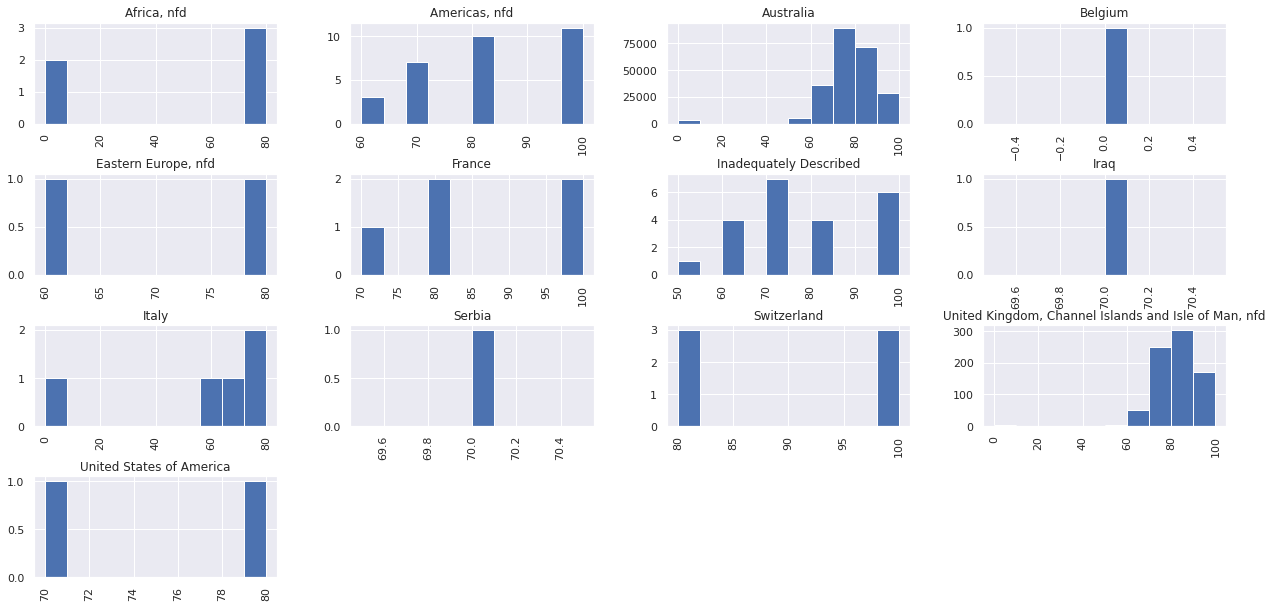

In [ ]:
df.hist(by='CountryOfBirthName',column = 'AchievementResult')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa727723b20>,
      dtype=object)

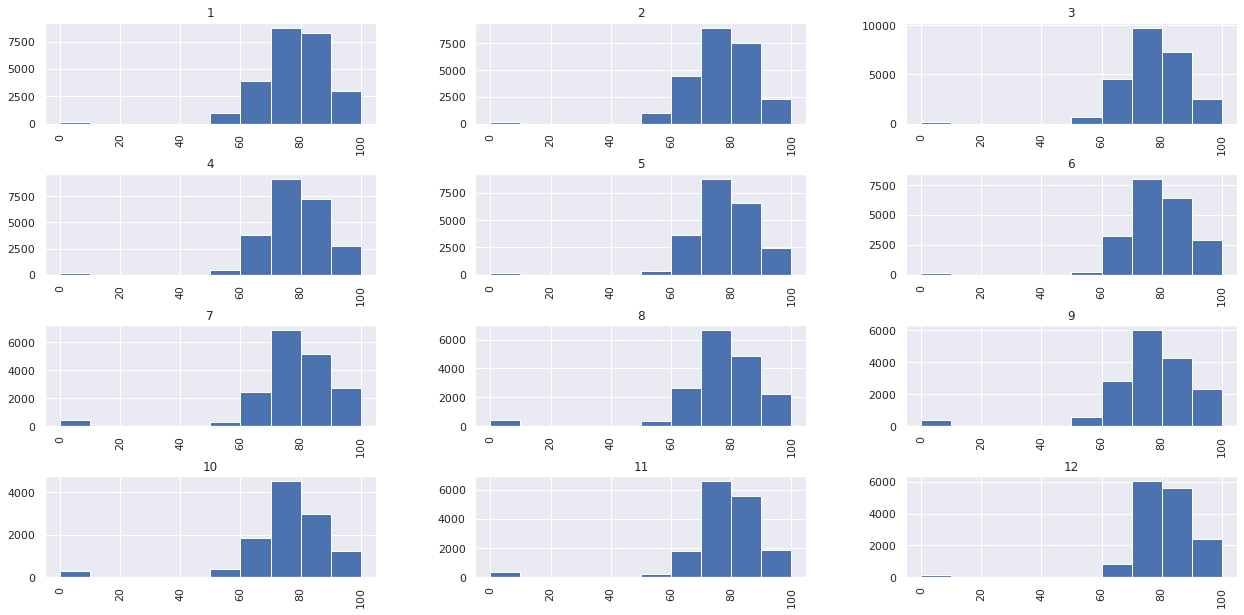

In [ ]:
df.hist(by='YearLevel',column = 'AchievementResult')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


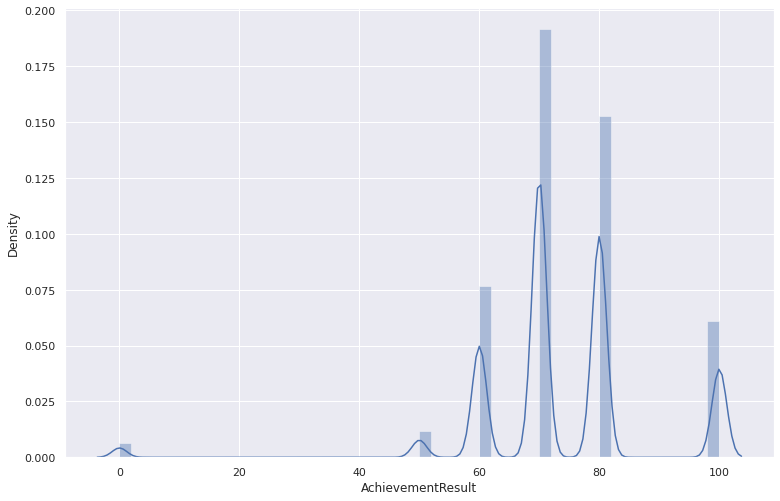

In [ ]:
sns.set(rc={'figure.figsize':(12.7,8.27)})
sns.distplot(df['AchievementResult'])#Plotting the distribution of the final grades.

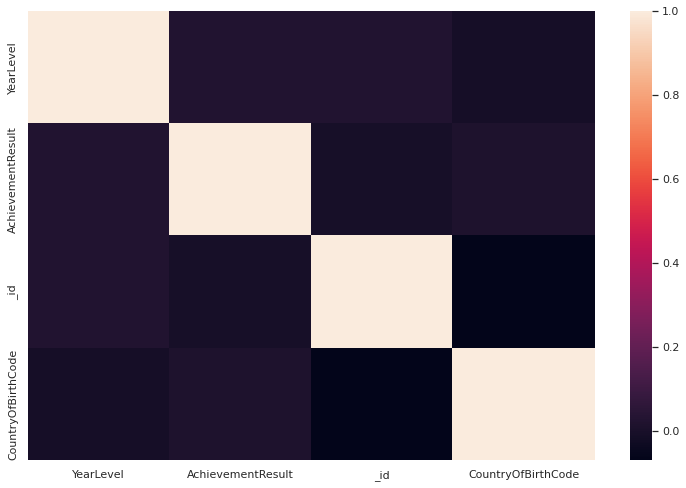

In [ ]:
corr = df.corr() # only works on numerical variables.
sns.heatmap(corr)

In [ ]:
print (corr['AchievementResult'].sort_values(ascending=False), '\n')

AchievementResult     1.000000
YearLevel             0.022145
CountryOfBirthCode    0.017645
_id                  -0.003699
Name: AchievementResult, dtype: float64 



From the correlation graph above, we can look at the numerical fields to know the values that affect the end result the most. Obviously AchievementResult have the greatest effect on our prediction. YearLevel and CountryOfBirthCode seem to not be very relevant in the dataset that are analyzing which can be a flag that may help us further understand the data in the future.

Now that we have analyzed the numerical data slightly and figured out the most correlated fields, we now have to take a look at the categorical data to figure out how useful the fields may be and how to introduce them into the prediction model. The simplest way to analyze those fields is to compare the means accross the categories.

In [ ]:
avgColumns= ['AchievementResult']
school = df.groupby(df['CountryOfBirthName'])[avgColumns].mean()
school.head()

,AchievementResult
CountryOfBirthName,
"Africa, nfd",48.000000
"Americas, nfd",82.903226
Australia,73.780122
Belgium,0.000000
"Eastern Europe, nfd",70.000000


In [ ]:
avgColumns= ['AchievementResult']
school = df.groupby(df['YearLevel'])[avgColumns].mean()
school.head()

,AchievementResult
YearLevel,
1,73.988710
2,72.900367
3,73.078002
4,74.043633
5,73.792476


In [ ]:
#We can also generate an aggregate summary of the means of the most valuable fields we found: 
focusGroupColumns = ['CountryOfBirthName', 'YearLevel']
aggs = df.groupby(focusGroupColumns)[avgColumns].mean()
print(aggs.to_string())

                                                                AchievementResult
CountryOfBirthName                                   YearLevel                   
Africa, nfd                                          1                  40.000000
                                                     4                  53.333333
Americas, nfd                                        1                  90.000000
                                                     3                  76.666667
                                                     4                  73.333333
                                                     5                  86.666667
                                                     6                  84.000000
                                                     7                  85.000000
                                                     9                  81.666667
                                                     10                 73.333333
                

In [ ]:
X = df.drop('AchievementResult', axis=1)
Y = df.AchievementResult
X = pd.get_dummies(X) # to convert categorical data to a format that can be used in regression. This isn't the best method to use as it increases the
                      # dimensionality of the dataset but it is a valid place to start
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235533 entries, 0 to 260177
Data columns (total 17 columns):
 #   Column                                                                   Non-Null Count   Dtype  
---  ------                                                                   --------------   -----  
 0   YearLevel                                                                235533 non-null  int64  
 1   _id                                                                      235533 non-null  int64  
 2   CountryOfBirthCode                                                       235533 non-null  float64
 3   LearningArea_MATHEMATICS                                                 235533 non-null  uint8  
 4   CountryOfBirthName_Africa, nfd                                           235533 non-null  uint8  
 5   CountryOfBirthName_Americas, nfd                                         235533 non-null  uint8  
 6   CountryOfBirthName_Australia                                

In [ ]:
# splitting the dataframe into 10 parts
# on basis of 'YearLevel' column values
# using Relational operator
#df1 = df[df['YearLevel'] == 1]

In [ ]:
df11 = df.iloc[:117766,:]
df12 = df.iloc[117767:,:]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df['AchievementResult'] = le.fit_transform(df['AchievementResult'])
df1

array([4, 5, 5, ..., 4, 4, 3])

##Hypothesis Testing

some of widely used hypothesis testing type :-
T Test ( Student T test)
Z Test
ANOVA Test
Chi-Square Test

T- Test :- A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features. It is mostly used when the data sets, like the set of data recorded as outcome from flipping a coin a 100 times, would follow a normal distribution and may have unknown variances. T test is used as a hypothesis testing tool, which allows testing of an assumption applicable to a population.
T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

####One Sample T-Test



The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean. The One Sample t Test is a parametric test.

In [ ]:
df.shape

(235533, 6)

In [ ]:
result = df['AchievementResult']
mean = result.mean()
median = result.median()
mode = result.mode()
std = result.std()
print(mean, median, mode, std)

73.79972233190253 70.0 0    70
dtype: int64 14.616740501555077


In [ ]:
#result.plot(kind = "barh", y = "mean", legend = False, title = "Average Prices")

The P value, or calculated probability, is the probability of finding the observed, or more extreme, results when the null hypothesis (H 0) of a study question is true — the definition of ‘extreme’ depends on how the hypothesis is being tested.

We are checking whether avg AchievementResult is 70 or not.

t-statistic:126.16160530864742
p-value:0.000000


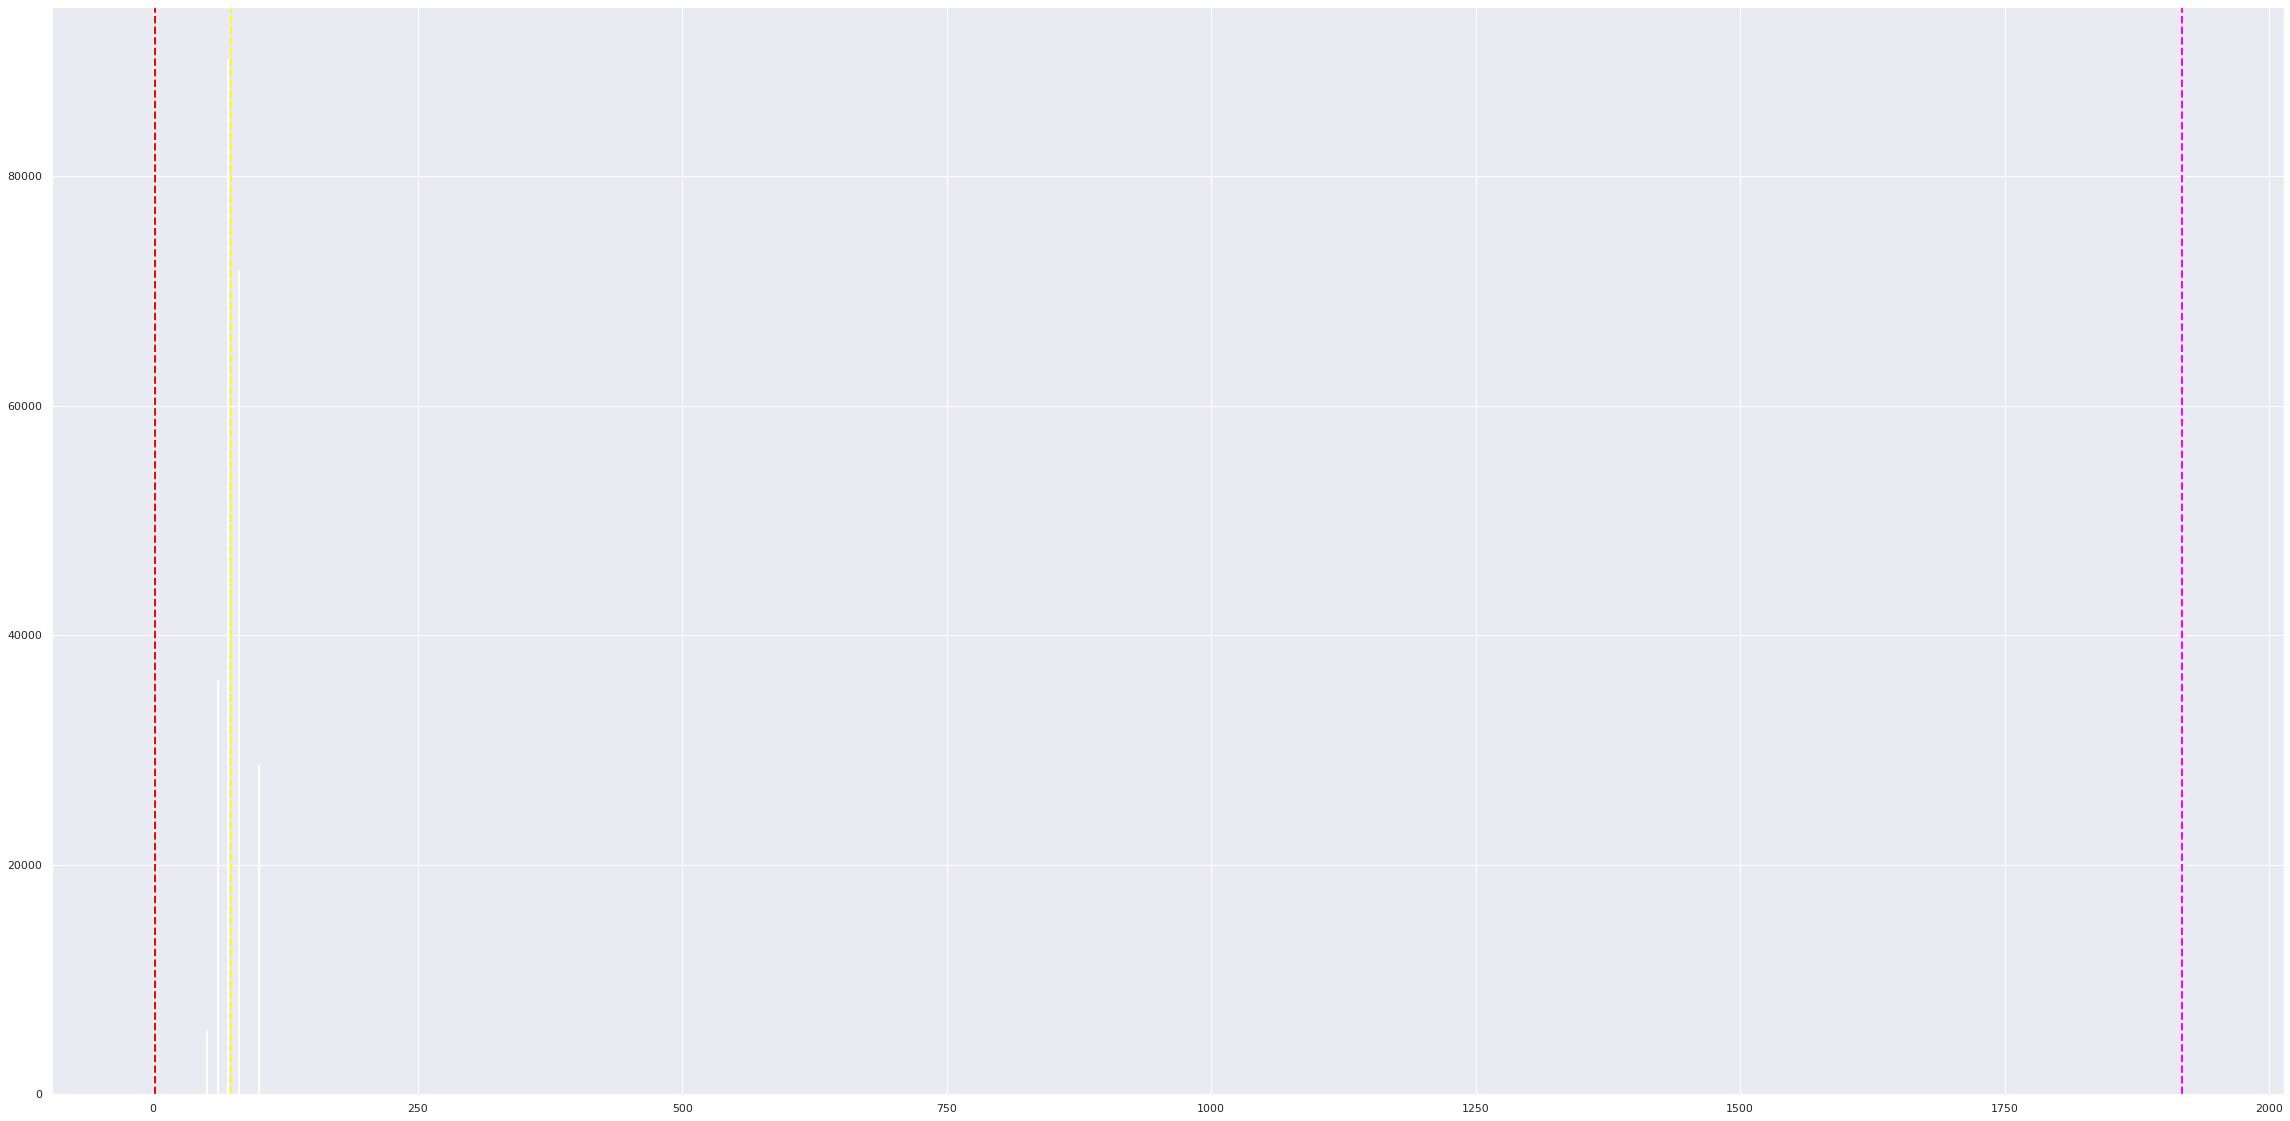

In [ ]:
a = df.AchievementResult
t, p = stats.ttest_1samp(a, popmean = 70) # pop mean is the hypothetical value
# ttest_1samp is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)
print ("t-statistic:" + str(t))
print("p-value:" + str(p1))

# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, 0, 1.15)
plt.figure(figsize=(40,20)) 
plt.hist(a, bins=100)
# show the hypothesized population mean
plt.axvline(a.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(a.mean() + t*a.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

t-statistic:126.16160530864742
p-value:0.000000


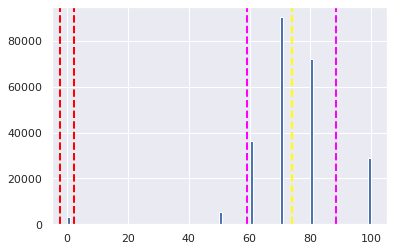

In [ ]:
a = df.AchievementResult
# T-Test
t,p = stats.ttest_1samp(a, 70)
print ("t-statistic:" + str(t))
# ttest_1samp is 2-tailed
print("p-value:" + '%f' % p)
# calculate a 95% confidence interval. 50% of the probability is outside this, 2.5% in each tail
ci = stats.norm.interval(0.95, 0, 1.15)
plt.hist(a, bins=100)
# show the hypothesized population mean
plt.axvline(a.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the confidence interval thresholds - 5% of propbability is under the curve outside these.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic thresholds - the p-value is the area under the curve outside these
plt.axvline(a.mean() - a.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(a.mean() + a.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

Since the p (p < 0.05) value is very small we reject the NULL hypothesis.

Hence we reject the NULL hypotheiss and accept the ALT hypothesis

####Two Sample T-Test

The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test.


In [ ]:
stats.ttest_rel(a = df11.AchievementResult, b = df12.AchievementResult)

Ttest_relResult(statistic=1.435808872167318, pvalue=0.15105939061086535)

Since the pvalue is not less than 0.05 we fail to reject the Null Hypothesis. Hence the campaign was successful

###Z-test

As our sample size is huge about 235k, It would be better to use z-test. Our data is randomly selected from the population, where each item has an equal chance of being selected.

####one-sample Z test

-31428.093263379473 P value 0.0


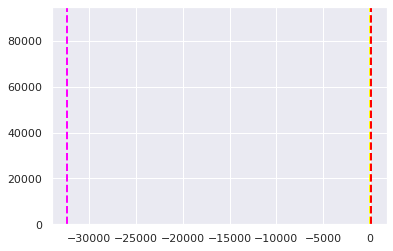

In [ ]:
from statsmodels.stats import weightstats as stests
ztest , pval = stests.ztest(df['AchievementResult'], x2=None, value=70)
print(ztest, 'P value', float(pval))

# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.95, 0, 70)
plt.hist(a, bins=100)
# show the hypothesized population mean
plt.axvline(a.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(a.mean() + ztest*a.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

In the plot produced by the code above, the yellow line shows the population mean for the null hypothesis. The area under the curve to the right of the red line represents the critical value of 0.05 (or 5%). 
So what should we conclude from these results?
Well, if the p-value is smaller than our critical value of 0.05, that means that under the null hypothesis, the probability of observing a sample mean as high as we did by random chance is low. That's a good sign for us, because it means that our sample is unlikely under the null, and therefore the null is a poor explanation for the data. We can safely reject the null hypothesis in favor of the alternative hypothesis - there's enough evidence to suggest that the population mean for our class ratings is greater than 0.
Conversely, if the p-value is greater than the critical value, we fail to reject the null hypothesis and conclude that the mean rating is not greater than 0. Note that we never actually accept the null hypothesis, we just conclude that there isn't enough evidence to reject it!

Notice this value is the same as the p-value listed in the original t-test output. A p-value of 0 means we'd expect to see data as extreme as our sample due to chance about 0% of the time if the null hypothesis was true. In this case, the p-value is lower than our significance level α (equal to 1-conf.level or 0.05) so we should reject the null hypothesis. If we were to construct a 95% confidence interval for the sample it would not capture achievement result mean of 70.

As p (p < 0.05) value is very small we reject the NULL hypothesis.
Hence we reject the NULL hypotheiss and accept the ALT hypothesis

####Two-sample Z test

Two-sample Z test- In two sample z-test , similar to t-test here we are checking two independent data groups and deciding whether sample mean of two group is equal or not.

1.436479946593912 0.15086581856926523


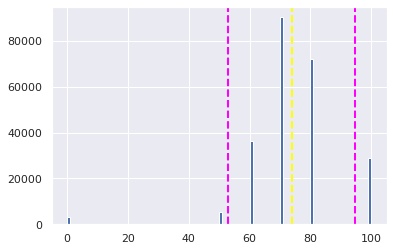

In [ ]:
ztest ,pval1 = stests.ztest(df11['AchievementResult'], x2=df12['AchievementResult'], value=0,alternative='two-sided')
print(float(ztest), float(pval1))

# calculate a 95% confidence interval. 50% of the probability is outside this, 2.5% in each tail
ci = stats.norm.interval(0.95, 0, 0)
plt.hist(a, bins=100)
# show the hypothesized population mean
plt.axvline(a.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the confidence interval thresholds - 5% of propbability is under the curve outside these.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic thresholds - the p-value is the area under the curve outside these
plt.axvline(a.mean() - ztest * a.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(a.mean() + ztest * a.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

As the pvalue is not less than 0.05 we fail to reject the Null Hypothesis. 

On the other hand, since there is a 15% chance of seeing a result this extreme due to chance, it is not significant at the 85% confidence level. This means if we were to construct a 85% confidence interval, it would capture the population mean:

In [ ]:
CrosstabResult=pd.crosstab(index=df['YearLevel'],columns=df['AchievementResult'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

AchievementResult  0    50    60    70    80    100
YearLevel                                          
1                  180  993  3920  8799  8296  2968
2                  152  986  4456  8989  7563  2344
3                  183  674  4527  9768  7294  2515
4                  184  444  3826  9176  7250  2772
5                  165  348  3687  8788  6555  2440
6                  151  268  3232  8030  6438  2894
7                  399  279  2453  6860  5141  2749
8                  440  357  2655  6661  4849  2226
9                  393  575  2843  6030  4295  2315
10                 293  382  1852  4515  2971  1256
11                 337  216  1818  6588  5587  1843
12                 156   46   852  6031  5633  2382


In [ ]:
ChiSqResult

(5302.937259310682,
 0.0,
 55,
 array([[ 323.93825069,  594.68782718, 3857.88775246, 9637.5100729 ,
         7676.25781525, 3065.71828151],
        [ 315.36205118,  578.94358752, 3755.75095634, 9382.35894758,
         7473.03044584, 2984.55401154],
        [ 321.42720128,  590.07802728, 3827.98283468, 9562.80366233,
         7616.75430619, 3041.95396823],
        [ 304.57097732,  559.13326795, 3627.23648915, 9061.31293704,
         7217.31792997, 2882.42839857],
        [ 283.07896983,  519.6781088 , 3371.28106465, 8421.90268455,
         6708.02892164, 2679.03025054],
        [ 270.58810867,  496.74730929, 3222.5232685 , 8050.28618071,
         6412.03710733, 2560.8180255 ],
        [ 230.25679204,  422.70683089, 2742.20428135, 6850.38629406,
         5456.31920792, 2179.12659373],
        [ 221.33290876,  406.32431124, 2635.92680431, 6584.8912042 ,
         5244.8528911 , 2094.67188037],
        [ 211.84242972,  388.90163162, 2522.90155095, 6302.53928324,
         5019.96014147, 2004

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42) # splitting data into 80% test and 20% train since the data is quite small. Usually it's best to use 60:40 or something similar
                                                                                              # with the possibility of validation data for certain types of regression models to avoid overfitting.

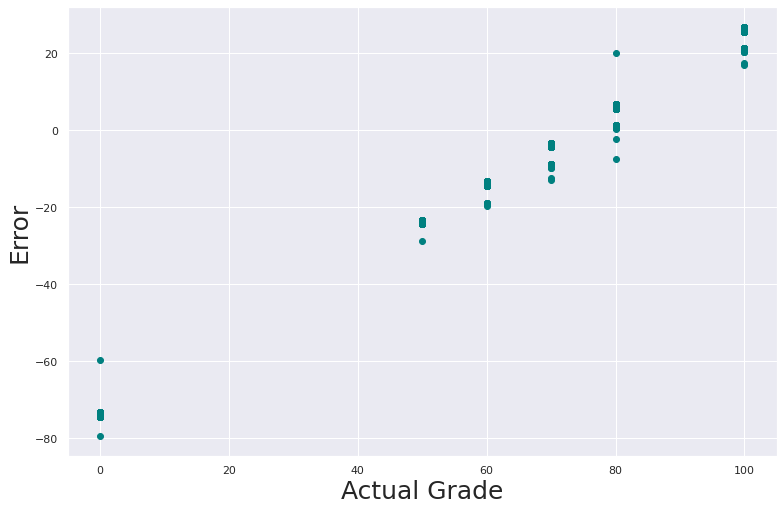

RMSE:
14.718436669277017
Variance score: 0.00


In [ ]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
err = Y_test - predicted

plt.scatter(Y_test, err , color ='teal')
plt.xlabel('Actual Grade',fontsize=25)
plt.ylabel('Error',fontsize=25)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test, predicted))

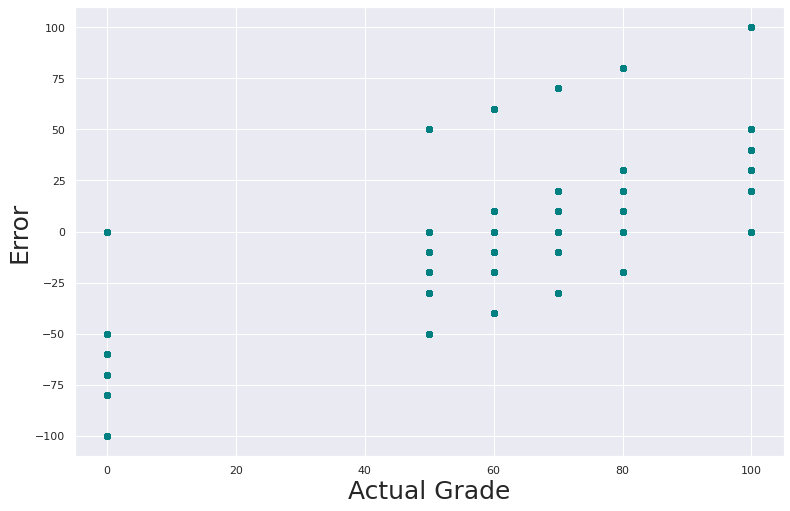

RMSE:
20.287435026502774
Variance score: -0.90


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_features='auto')
dtr.fit(X_train, Y_train)
predicted = dtr.predict(X_test)
err = Y_test - predicted

plt.scatter(Y_test, err , color ='teal')
plt.xlabel('Actual Grade',fontsize=25)
plt.ylabel('Error',fontsize=25)


plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test, predicted))

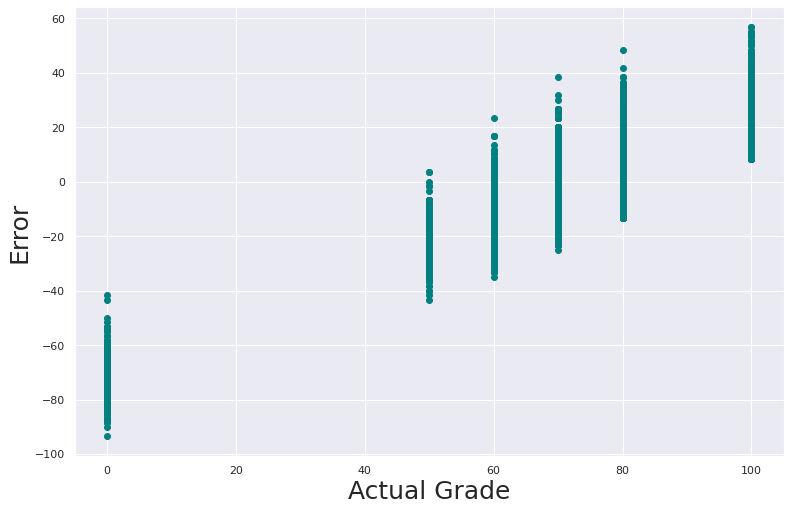

RMSE:
15.751958218708198
Variance score: -0.14


In [ ]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, Y_train)

predicted = knn.predict(X_test)
err = Y_test - predicted

plt.scatter(Y_test, err , color ='teal')
plt.xlabel('Actual Grade',fontsize=25)
plt.ylabel('Error',fontsize=25)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test, predicted))

In [ ]:
df['AchievementResult'].value_counts()

70     90235
80     71872
60     36121
100    28704
50      5568
0       3033
Name: AchievementResult, dtype: int64

In [ ]:
df['AchievementResult'].value_counts().to_frame()

,AchievementResult
70,90235
80,71872
60,36121
100,28704
50,5568
0,3033


In [ ]:
df['CountryOfBirthName'].value_counts().to_frame()

,CountryOfBirthName
Australia,234667
"United Kingdom, Channel Islands and Isle of Man, nfd",785
"Americas, nfd",31
Inadequately Described,22
Switzerland,6
"Africa, nfd",5
France,5
Italy,5
United States of America,2
"Eastern Europe, nfd",2


In [ ]:
df['YearLevel'].value_counts().to_frame()

,YearLevel
1,25156
3,24961
2,24490
4,23652
5,21983
6,21013
7,17881
8,17188
9,16451
11,16389


In [ ]:
df['LearningArea'].value_counts().to_frame()

,LearningArea
MATHEMATICS,235533


In [ ]:
df.mean()

<ipython-input-96-c61f0c8f89b5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


YearLevel                  5.793324
AchievementResult         73.799722
_id                   131158.500656
CountryOfBirthCode      1105.335078
dtype: float64

In [ ]:
df.mean(axis=1) 

<ipython-input-97-741e6943a02f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean(axis=1)


0           296.75
1           302.00
2           303.25
3           299.25
4           299.25
            ...   
260173    65675.75
260174    65677.50
260175    65670.50
260176    65670.75
260177    65668.75
Length: 235533, dtype: float64

In [ ]:
df.median()

<ipython-input-98-6d467abf240d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


YearLevel                  5.0
AchievementResult         70.0
_id                   130986.0
CountryOfBirthCode      1101.0
dtype: float64

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fa71f1419d0> has a label of '_id' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
<ipython-input-100-95eb4daf03cf>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.vlines(df.mean(),     # Plot black line at mean
<ipython-input-100-95eb4daf03cf>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.vlines(df.median(),   # Plot red line at median


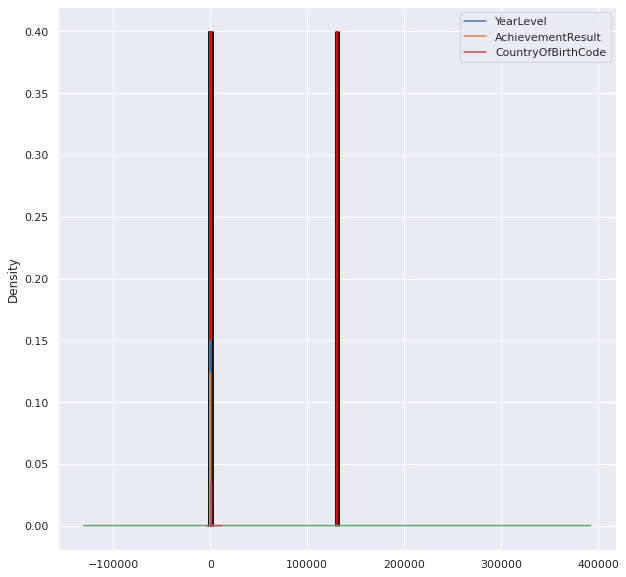

In [ ]:


df.plot(kind="density",
              figsize=(10,10));


plt.vlines(df.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.4,
           linewidth=5.0);

plt.vlines(df.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.4, 
           linewidth=2.0,
           color="red");

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fa71f07c040> has a label of '_id' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
<ipython-input-101-edbf1b3152d4>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.vlines(df.mean(),     # Plot black line at mean
<ipython-input-101-edbf1b3152d4>:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.vlines(df.median(),   # Plot red line at median


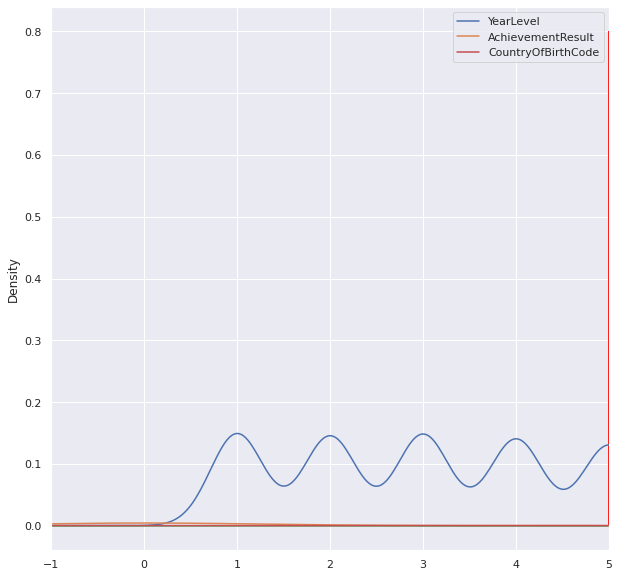

In [ ]:
df.plot(kind="density",
              figsize=(10,10),
              xlim=(-1,5));


plt.vlines(df.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.8,
           linewidth=5.0);

plt.vlines(df.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.8, 
           linewidth=2.0,
           color="red");

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fa71f09ecd0> has a label of '_id' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
<ipython-input-102-e2d5e07d0969>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.vlines(df.mean(),     # Plot black line at mean
<ipython-input-102-e2d5e07d0969>:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.vlines(df.median(),   # Plot red line at median


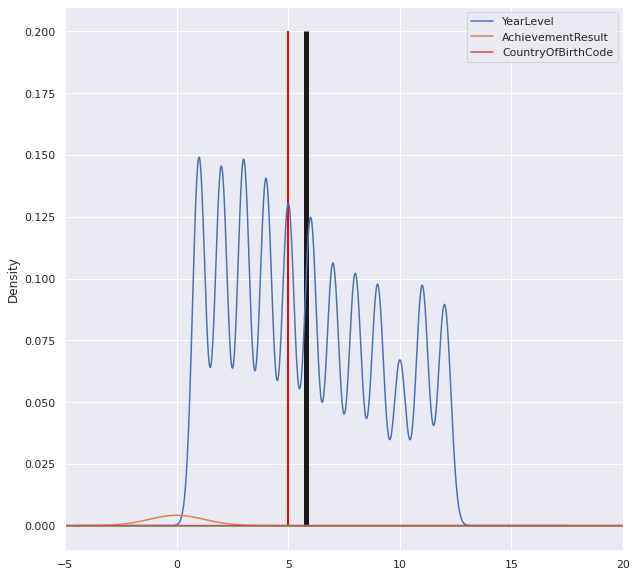

In [ ]:
df.plot(kind="density",
              figsize=(10,10),
              xlim=(-5,20));


plt.vlines(df.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=5.0);

plt.vlines(df.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2, 
           linewidth=2.0,
           color="red");

In [ ]:
df.mode()

,LearningArea,YearLevel,AchievementResult,CountryOfBirthName,_id,CountryOfBirthCode
0,MATHEMATICS,1.0,70.0,Australia,1,1101.0
1,NaN,NaN,NaN,NaN,2,NaN
2,NaN,NaN,NaN,NaN,3,NaN
3,NaN,NaN,NaN,NaN,4,NaN
4,NaN,NaN,NaN,NaN,5,NaN
...,...,...,...,...,...,...
235528,NaN,NaN,NaN,NaN,261496,NaN
235529,NaN,NaN,NaN,NaN,261497,NaN
235530,NaN,NaN,NaN,NaN,261498,NaN
235531,NaN,NaN,NaN,NaN,261499,NaN


In [ ]:
# apply the dtype attribute
result = df.dtypes

print("Output:")
print(result)

Output:
LearningArea           object
YearLevel               int64
AchievementResult       int64
CountryOfBirthName     object
_id                     int64
CountryOfBirthCode    float64
dtype: object


In [ ]:
df.var()

<ipython-input-105-28ded241fd7c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


YearLevel             1.154934e+01
AchievementResult     2.136491e+02
_id                   5.646439e+09
CountryOfBirthCode    1.036244e+04
dtype: float64

In [ ]:
df["AchievementResult"].var()

213.64910288980053

In [ ]:
df["AchievementResult"].std()

14.616740501555077

In [ ]:
norm_data = np.random.normal(size=100000)
skewed_data = np.concatenate((np.random.normal(size=35000)+2, 
                             np.random.exponential(size=65000)), 
                             axis=0)
uniform_data = np.random.uniform(0,2, size=100000)
peaked_data = np.concatenate((np.random.exponential(size=50000),
                             np.random.exponential(size=50000)*(-1)),
                             axis=0)

data_df = pd.DataFrame({"norm":norm_data,
                       "skewed":skewed_data,
                       "uniform":uniform_data,
                       "peaked":peaked_data})

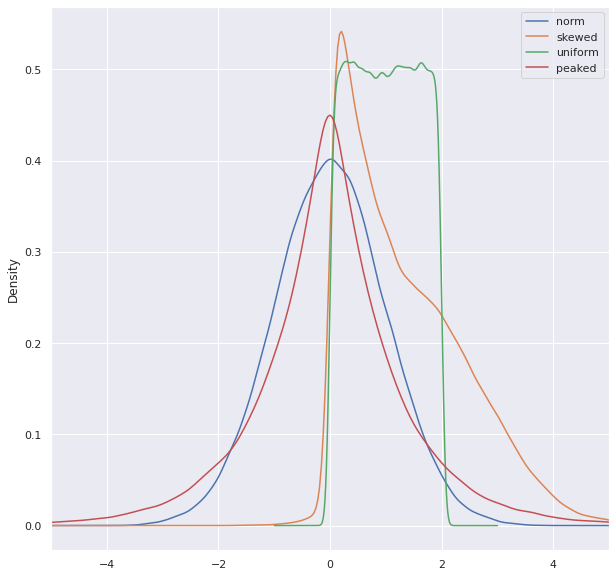

In [ ]:
data_df.plot(kind="density",
            figsize=(10,10),
            xlim=(-5,5));

In [ ]:
data_df.skew()

norm       0.008881
skewed     1.017400
uniform    0.000346
peaked     0.000925
dtype: float64

In [ ]:
data_df.kurt()

norm       0.022778
skewed     1.511234
uniform   -1.205538
peaked     3.016822
dtype: float64

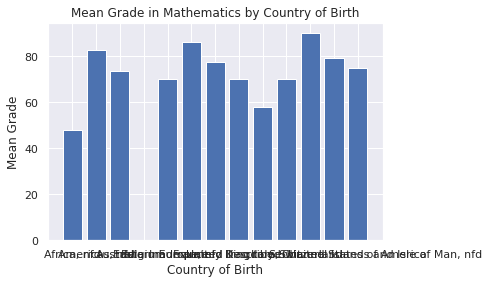

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# mean grade by country of birth
mean_grade_by_country = df.groupby('CountryOfBirthName').mean()['AchievementResult']

# mean grade by year level
mean_grade_by_year = df.groupby('YearLevel').mean()['AchievementResult']

# bar plot of mean grade by country of birth
plt.bar(mean_grade_by_country.index, mean_grade_by_country)
plt.title("Mean Grade in Mathematics by Country of Birth")
plt.xlabel("Country of Birth")
plt.ylabel("Mean Grade")
plt.show()